# Analysis of alignment statistics Dataset1: Control 

Cynthia Soto<br>
Fecha: 20 de Agosto 2020<br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Dataset1: Healthy - Arabidopsis (Col-0)<br>
Dataset composed by 8 transcriptomes of A.thaliana healthy<br>
Datatype representation: tvs file 
<br><br>
Statistics generated by STAR alignment were retrieved from the alignment output files and stored into a unique  file called ~/athal1_stats/my_statistics_STAR_alignment.txt for further analysis

In [3]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# extract first element from a list of lists
def Extract(lst): 
    return [item[0] for item in lst] 

In [5]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/athal1_stats/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/athal1_stats


In [6]:
df=pd.read_csv("my_statistics_STAR_alignment.txt", sep='\s+', header=None)
df.columns = ["sample","stat", "value"] 
df['value'] = df['value'].str.rstrip('%').astype('float') #/ 100.0

In [7]:
df.head(10)

,sample,stat,value
0,SRR3383640,unique_mapped_reads,98.31
1,SRR3383641,unique_mapped_reads,98.34
2,SRR3383782,unique_mapped_reads,98.13
3,SRR3383783,unique_mapped_reads,98.34
4,SRR3383821,unique_mapped_reads,98.09
5,SRR3383822,unique_mapped_reads,97.87
6,SRR6283144,unique_mapped_reads,97.51
7,SRR6283145,unique_mapped_reads,97.99
8,SRR3383640,average_mapped_length,91.02
9,SRR3383641,average_mapped_length,90.77


In [8]:
sample_names =  df['sample'].unique()
print(sample_names)
stat_names= df['stat'].unique()
print(stat_names)
# Rename to give more sense
sample_names = ['At12','At12','At18','At18','At24','At24','At30','At30']
print(sample_names)

['SRR3383640' 'SRR3383641' 'SRR3383782' 'SRR3383783' 'SRR3383821'
 'SRR3383822' 'SRR6283144' 'SRR6283145']
['unique_mapped_reads' 'average_mapped_length' 'number_splices'
 'mismatch_rate_per_base' 'deletion_average_length'
 'reads_unmapped_too_short']
['At12', 'At12', 'At18', 'At18', 'At24', 'At24', 'At30', 'At30']


In [9]:
is_unique_mapped =  df[df['stat']=="unique_mapped_reads"]
#print(is_unique_mapped)
f_mapped = is_unique_mapped['value']
#type(f_mapped)
f_mapped_no_index = f_mapped.to_string(index=False)
print(f_mapped_no_index)

 98.31
 98.34
 98.13
 98.34
 98.09
 97.87
 97.51
 97.99


In [10]:
is_deletion =  df[df['stat']=="reads_unmapped_too_short"]
f_deletion = is_deletion['value']
#print(f_deletion)
f_deletion_no_index = f_deletion.to_string(index=False)
print(f_deletion_no_index)

 0.07
 0.09
 0.07
 0.07
 0.09
 0.08
 0.73
 0.15


In [11]:
# porcentajes de alineamientos unicos
f_mapped.sort_values()
# porcentajes de reads_unmapped_too_short
f_deletion.sort_values()

40    0.07
42    0.07
43    0.07
45    0.08
41    0.09
44    0.09
47    0.15
46    0.73
Name: value, dtype: float64

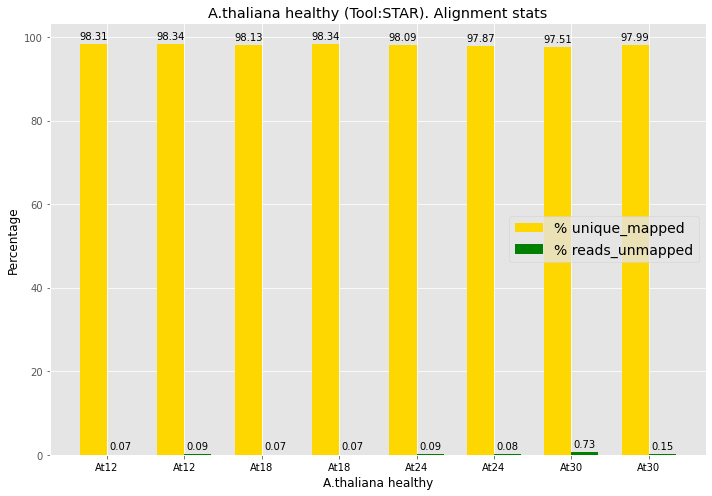

In [13]:
x = np.arange(len(sample_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')

rects1 = ax.bar(x - width/2, f_mapped, width, label='% unique_mapped', color='gold')
rects2 = ax.bar(x + width/2, f_deletion, width, label='% reads_unmapped', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', color='black')
ax.set_xlabel('A.thaliana healthy', color='black')
ax.set_title('A.thaliana healthy (Tool:STAR). Alignment stats')
ax.set_xticks(x)
ax.set_xticklabels(sample_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="center right", fontsize=14)
plt.xticks(color='black')  #rotation=30, 
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("../athal1_stats/alignment1_STAR_percentages.png")
plt.show()